How are in-demand skills trending for Data Scientists?

Methology

    1.Aggregate skill counts monthly
    2.Re-analyze based on percentage of total jobs
    3.Plot the monthly skill demand

In [81]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [82]:
df_DS_US = df[(df["job_title"] == "Data Scientist") & (df["job_country"])].copy()
              

In [83]:
df_DS_US["job_posted_month_no"] = df_DS_US["job_posted_date"].dt.month

In [84]:
df_DS_US_explode = df_DS_US.explode("job_skills")


In [85]:
df_DS_US_pivot = df_DS_US_explode.pivot_table(index="job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0)

df_DS_US_pivot.loc["Total"] = df_DS_US_pivot.sum()

df_DS_US_pivot = df_DS_US_pivot[df_DS_US_pivot.loc["Total"].sort_values(ascending=False).index]

df_DS_US_pivot = df_DS_US_pivot.drop("Total")

df_DS_US_pivot

job_skills,python,sql,r,tableau,aws,sas,spark,azure,tensorflow,pandas,...,ionic,delphi,symfony,clickup,ocaml,huggingface,esquisse,wrike,xamarin,debian
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3858,2721,2072,939,963,1010,904,771,690,625,...,1,1,0,0,0,0,0,0,0,0
2,2598,1789,1410,652,595,698,570,518,485,415,...,0,0,0,0,0,0,1,0,0,0
3,2574,1794,1374,705,647,590,531,515,437,408,...,0,0,0,0,0,0,0,0,0,0
4,2642,1838,1431,702,599,578,524,473,485,400,...,0,0,0,0,0,0,0,0,0,0
5,2418,1682,1248,650,601,540,528,444,387,355,...,0,0,0,0,1,0,0,0,0,0
6,2773,1909,1496,701,641,596,564,522,523,435,...,0,0,0,0,0,0,0,0,0,0
7,2525,1769,1346,713,655,524,466,522,439,379,...,0,0,1,0,0,0,0,0,0,0
8,3197,2261,1749,851,740,816,671,605,555,476,...,0,0,0,1,0,0,0,0,0,0
9,2380,1589,1160,569,554,478,516,487,430,381,...,1,1,0,0,0,1,0,0,1,0


In [86]:
DS_total = df_DS_US.groupby("job_posted_month_no").size()

In [87]:
df_DS_percent =  df_DS_US_pivot.div(DS_total/100, axis=0)

In [88]:
df_DS_percent = df_DS_percent.reset_index()
df_DS_percent["job_posted_month"] = df_DS_percent["job_posted_month_no"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
df_DS_percent = df_DS_percent.set_index("job_posted_month")
df_DS_percent = df_DS_percent.drop(columns="job_posted_month_no")

df_DS_percent

job_skills,python,sql,r,tableau,aws,sas,spark,azure,tensorflow,pandas,...,ionic,delphi,symfony,clickup,ocaml,huggingface,esquisse,wrike,xamarin,debian
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,76.806689,54.170814,41.250249,18.694008,19.171810,20.107505,17.997213,15.349393,13.736811,12.442763,...,0.019908,0.019908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,77.598566,53.434886,42.114695,19.474313,17.771804,20.848268,17.025090,15.471924,14.486260,12.395460,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029869,0.000000,0.000000,0.000000
Mar,76.357164,53.218629,40.759419,20.913675,19.193118,17.502225,15.752002,15.277366,12.963512,12.103233,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,78.211960,54.410894,42.362345,20.781528,17.732386,17.110716,15.512137,14.002368,14.357608,11.841326,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,76.859504,53.464717,39.669421,20.661157,19.103624,17.164654,16.783217,14.113160,12.301335,11.284170,...,0.000000,0.000000,0.000000,0.000000,0.031786,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,78.868032,54.294653,42.548350,19.937429,18.230944,16.951081,16.040956,14.846416,14.874858,12.372014,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,76.330109,53.476421,40.689238,21.553809,19.800484,15.840387,14.087062,15.779927,13.270859,11.457074,...,0.000000,0.000000,0.030230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,74.783626,52.888889,40.912281,19.906433,17.309942,19.087719,15.695906,14.152047,12.982456,11.134503,...,0.000000,0.000000,0.000000,0.023392,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,70.896634,47.333929,34.554662,16.949657,16.502830,14.238904,15.370867,14.507000,12.809056,11.349419,...,0.029789,0.029789,0.000000,0.000000,0.000000,0.029789,0.000000,0.000000,0.029789,0.000000


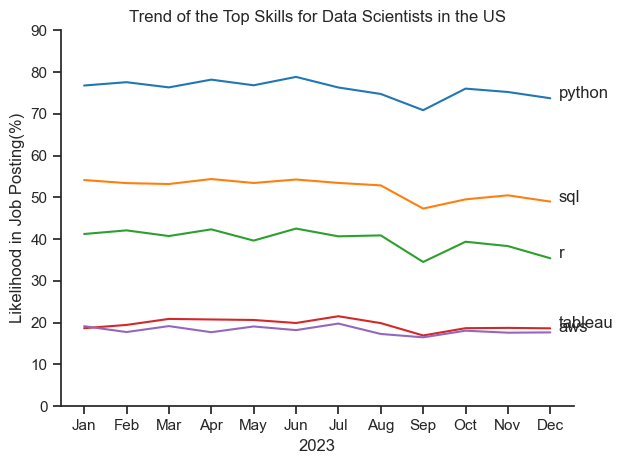

In [101]:
df_plot = df_DS_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette="tab10")
sns.set_theme(style="ticks")
sns.despine()

plt.title("Trend of the Top Skills for Data Scientists in the US")
plt.ylabel("Likelihood in Job Posting(%)")
plt.ylim(0, 90)
plt.xlabel("2023")
plt.legend().remove()

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

plt.tight_layout()
plt.show()